# Geely Automotive Pricing Model

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

## Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 



In [1040]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)



In [1041]:
# Reading the data set
cars=pd.read_csv("CarPrice_Assignment.csv")

####  Understanding the dataset and it's attributes:

In [1042]:
# looking into first 5 rows
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1043]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1044]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1045]:
# Inspecting the shape of the dataframe
cars.shape

(205, 26)

## Data Cleaning

In [1046]:
# checking the percentage of missing values in each column 
round(100 * (cars.isnull().sum() / len(cars)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Great! Looks like data does not have any null values

In [1047]:
# Dropping Duplicates rows if exists
cars=cars.drop_duplicates()

In [1048]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

As mentioned in the data dictionary column __"symboling"__ is categorical variable.
Let's make the category classifying based on risk as below:

-ve symbol as safe

0, 1 as moderately

2,3 as risky

In [1049]:
cars['symboling'] = cars['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderately',1: 'moderately',2: 'risky',3:'risky'})
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,risky,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,risky,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,moderately,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,risky,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,risky,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1050]:
# checking the mapped values
cars['symboling'].unique()

array(['risky', 'moderately', 'safe'], dtype=object)

In [1051]:
#there is nothing to do analysis with the ID fileds so we will drop car_ID columns 
cars.pop('car_ID')

0        1
1        2
2        3
3        4
4        5
      ... 
200    201
201    202
202    203
203    204
204    205
Name: car_ID, Length: 205, dtype: int64

The variable named __CarName__ which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building. 

In [1052]:
# splitting the CarName and extracting the first part of it as CarCompany
cars['CarCompany']=cars['CarName'].str.split(' ').str[0]

In [1053]:
#Replacing the values of CarCompany with incorrect spellings with the correct ones

cars['CarCompany'].replace('maxda','mazda',inplace=True)
cars['CarCompany'].replace('Nissan','nissan',inplace=True)
cars['CarCompany'].replace('porcshce','porsche',inplace=True)
cars['CarCompany'].replace('toyouta','toyota',inplace=True)
cars['CarCompany'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [1054]:
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1055]:
# converting the CarCompany to lower case of uniqueness
cars['CarCompany']=cars['CarCompany'].str.lower()

In [1056]:
cars['CarCompany'].value_counts().sort_index(ascending=True)

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: CarCompany, dtype: int64

As there are so many __car companies__, where further we can not create dummy varible for each. so will categorize based on price as rages __low Range, mid Range and high Range__



In [1057]:


cars.groupby('CarCompany').price.mean().sort_values(ascending=False)

CarCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [1058]:
# creating data dictionary to car company mapping

CarCompany_price_slab= {
    'chevrolet' : 'lowRange',
    'dodge' : 'lowRange',
    'plymouth' : 'lowRange',
    'honda' : 'lowRange',
    'subaru' : 'lowRange',
    'isuzu' : 'lowRange',
    'mitsubishi' : 'lowRange',
    'renault' : 'lowRange',
    'toyota' : 'lowRange',
    'volkswagen' : 'midRange',
    'nissan' : 'midRange',
    'mazda' : 'midRange',
    'saab' : 'midRange',
    'peugeot' : 'midRange',
    'alfa-romero' : 'midRange',
    'mercury' : 'midRange',
    'audi' : 'midRange',
    'volvo' : 'midRange',
    'bmw' : 'highRange',
    'buick' : 'highRange',
    'porsche' : 'highRange',
    'jaguar' : 'highRange',
    }

In [1059]:
# mapping the car companies to the respective proce range and creating another variable named "CarCompany_price_slab"
cars['CarCompany_price_slab'] = cars['CarCompany'].map(CarCompany_price_slab)
cars.drop('CarCompany',axis=1,inplace=True)
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany_price_slab
0,risky,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midRange
1,risky,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midRange
2,moderately,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midRange
3,risky,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midRange
4,risky,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midRange


In [1060]:
cars['CarCompany_price_slab'].unique()

array(['midRange', 'highRange', 'lowRange'], dtype=object)

In [1061]:
# Removing the column "CarName" as we have extracted the required data from it.
cars.pop('CarName')

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

#### Outliers

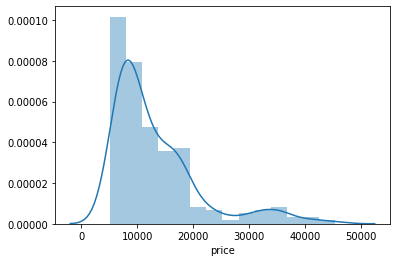

In [1062]:
# plotting the price data to check the outliers

sns.distplot(cars.price)

We see that the __'price'__ variable has a right skewed distribution, this is clearly due to outliers in the variable.

In [1063]:
# droping all outlier with price within 3 standard deviations from the mean value
# calculating upper and lower limit to drop
upper_limit=cars.price.mean() + 3 * cars.price.std()

lower_limit=cars.price.mean() - 3 * cars.price.std()

print(upper_limit)
print(lower_limit)


37243.267565961156
-10689.846424497744


In [1064]:
cars.shape

(205, 25)

In [1065]:
cars[(cars.price > upper_limit) | (cars.price < lower_limit)]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany_price_slab
16,moderately,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0,highRange
73,moderately,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0,highRange
74,moderately,gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0,highRange


In [1066]:
cars=cars[(cars.price < upper_limit) & (cars.price > lower_limit)]

In [1067]:
cars.shape

(202, 25)

### Data Visulization

Dividing numerical and categorical data for plotting

In [1068]:
numerical = cars.select_dtypes(include = [np.number])
numerical.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

##### scatter plotting of all numeric variables

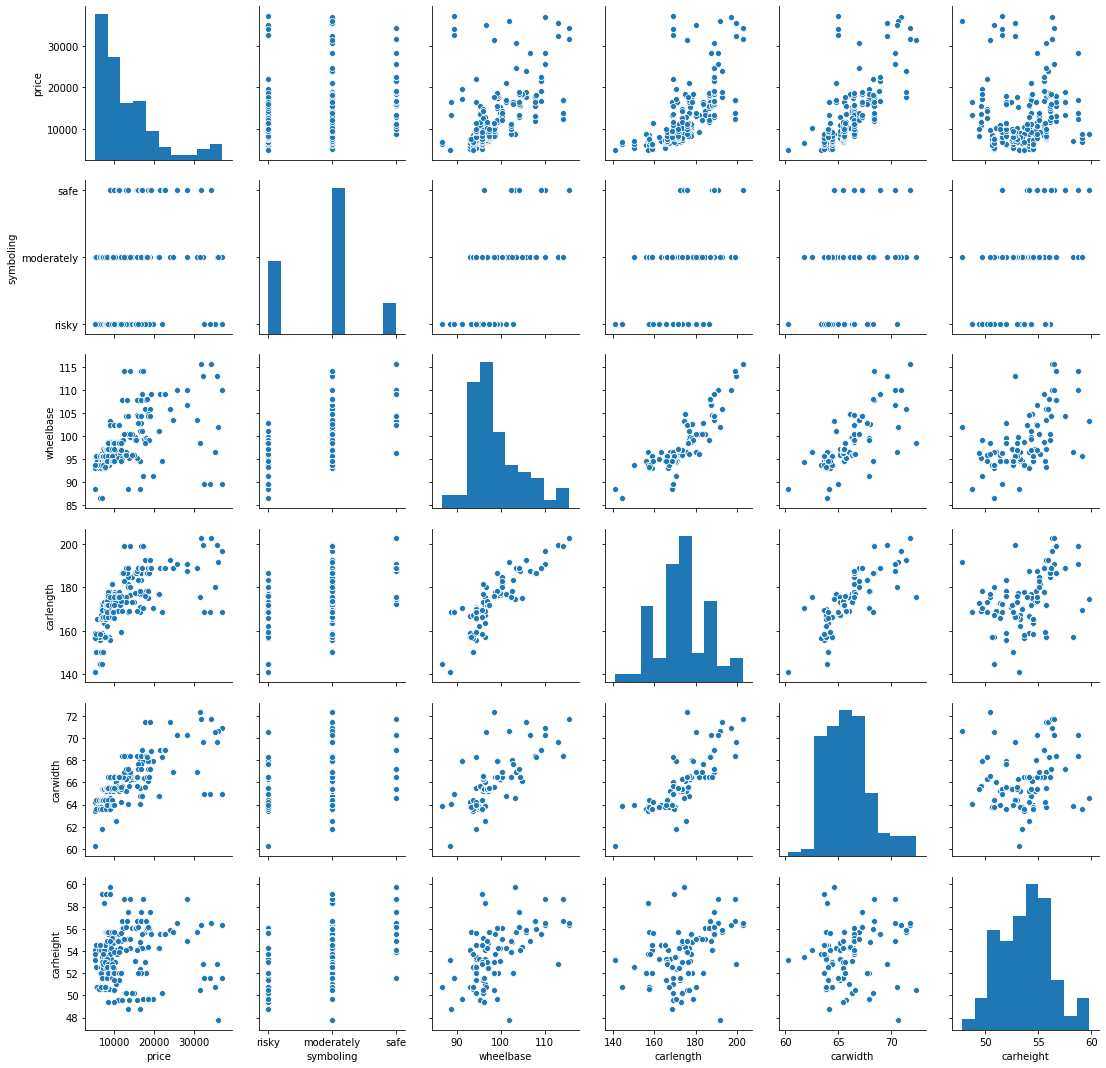

In [1069]:

sns.pairplot(vars=['price','symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight'],data=cars)

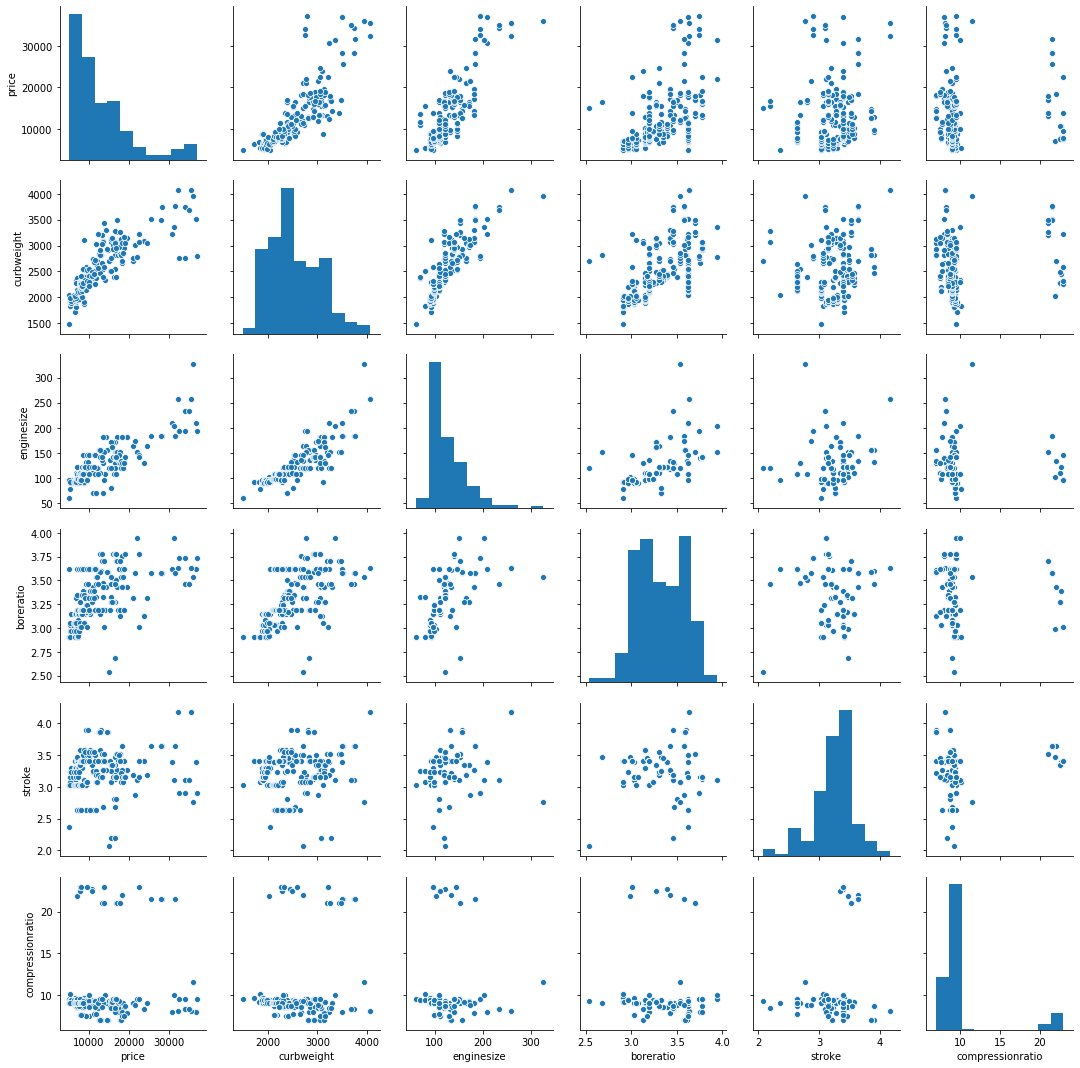

In [1070]:
sns.pairplot(vars=['price','curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio'],data=cars)

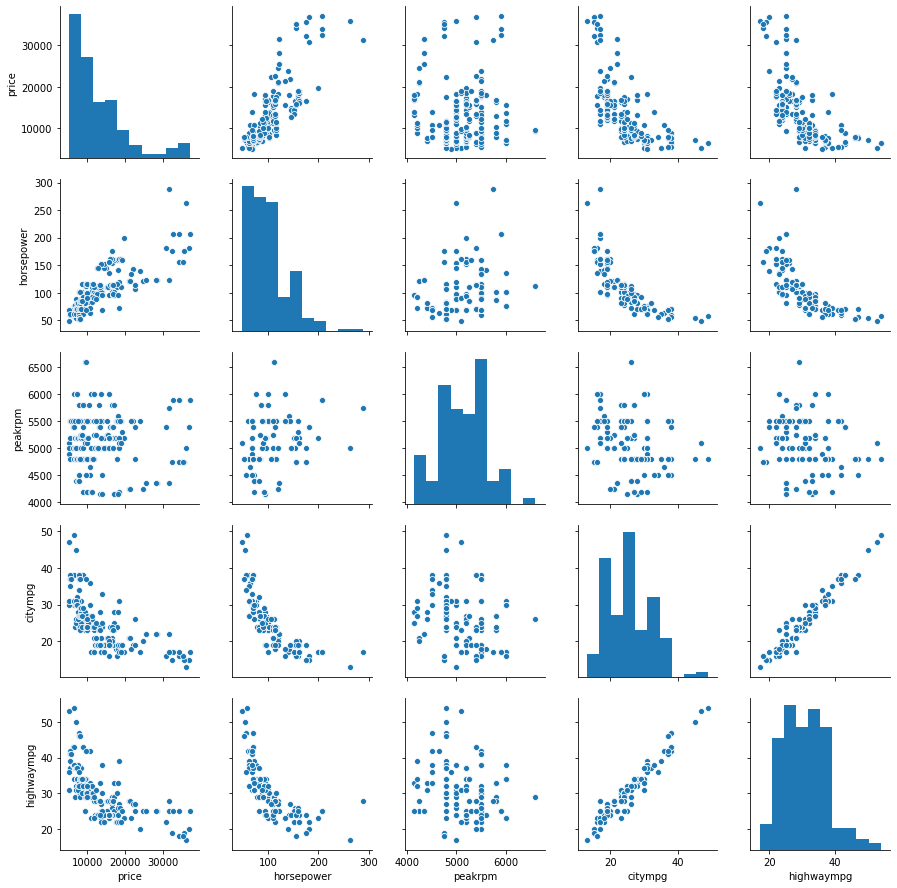

In [1071]:
sns.pairplot(vars=['price','horsepower', 'peakrpm', 'citympg', 'highwaympg'],data=cars)

##### box plotting of all categorical variables

In [1072]:
categorical = cars.select_dtypes(include = [np.object])
categorical.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'CarCompany_price_slab'],
      dtype='object')

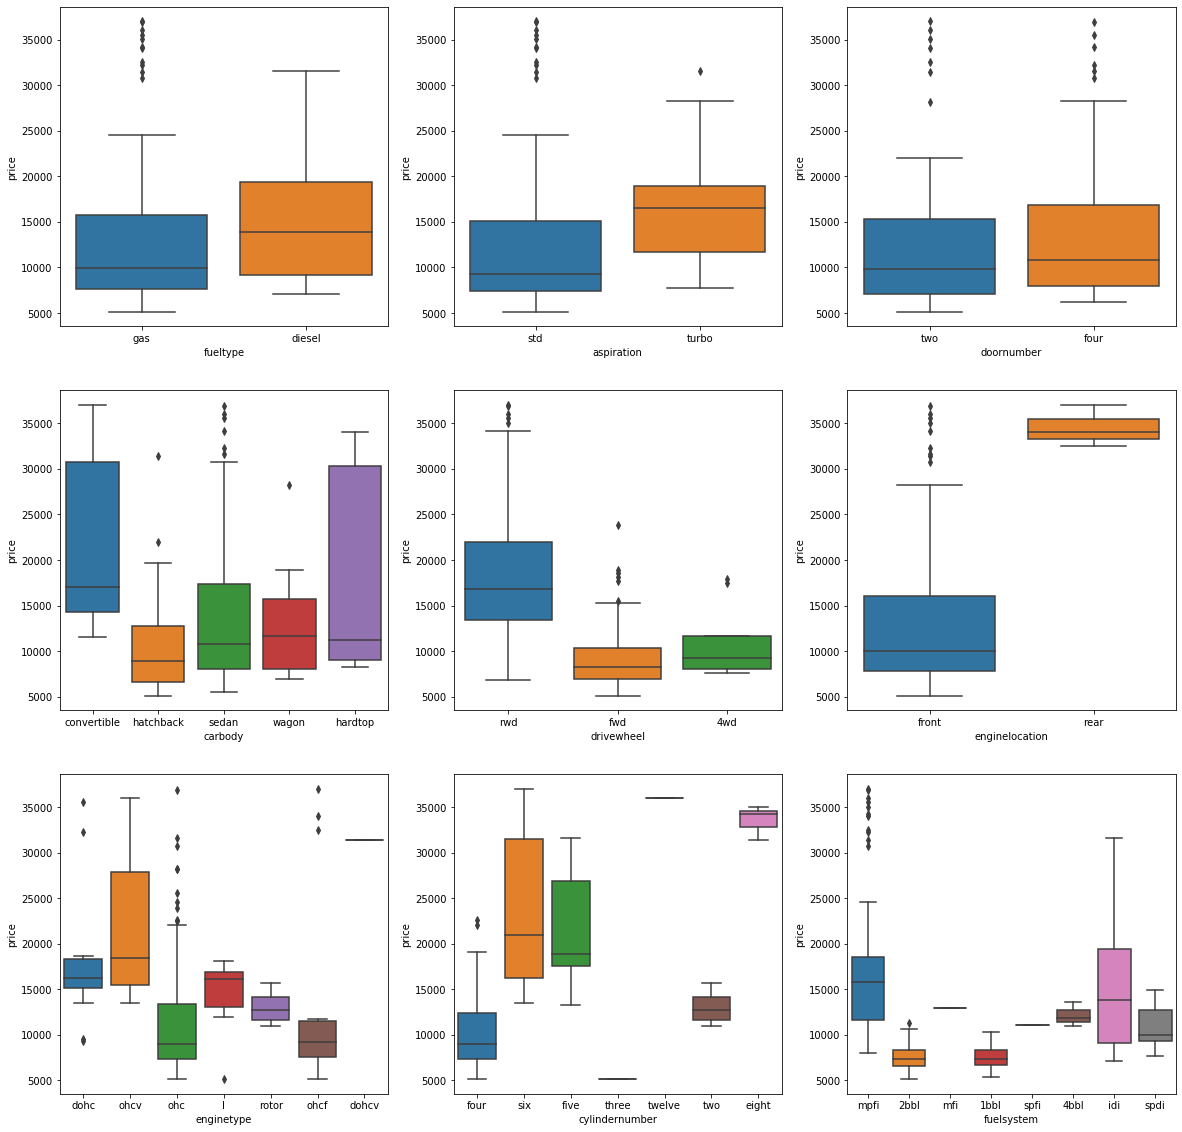

In [1073]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)
plt.show()

#### Observations:

   * enginelocation and aspiration  has a affect on the pricing of the car.
    
   * fuel type seems have an effect on the pricing of the cars. 
    
   * The price of real wheel drive is significantly higher that other drivewheel options.
    
   * cylindernumber and engine type also seem to regulate the price of cars.


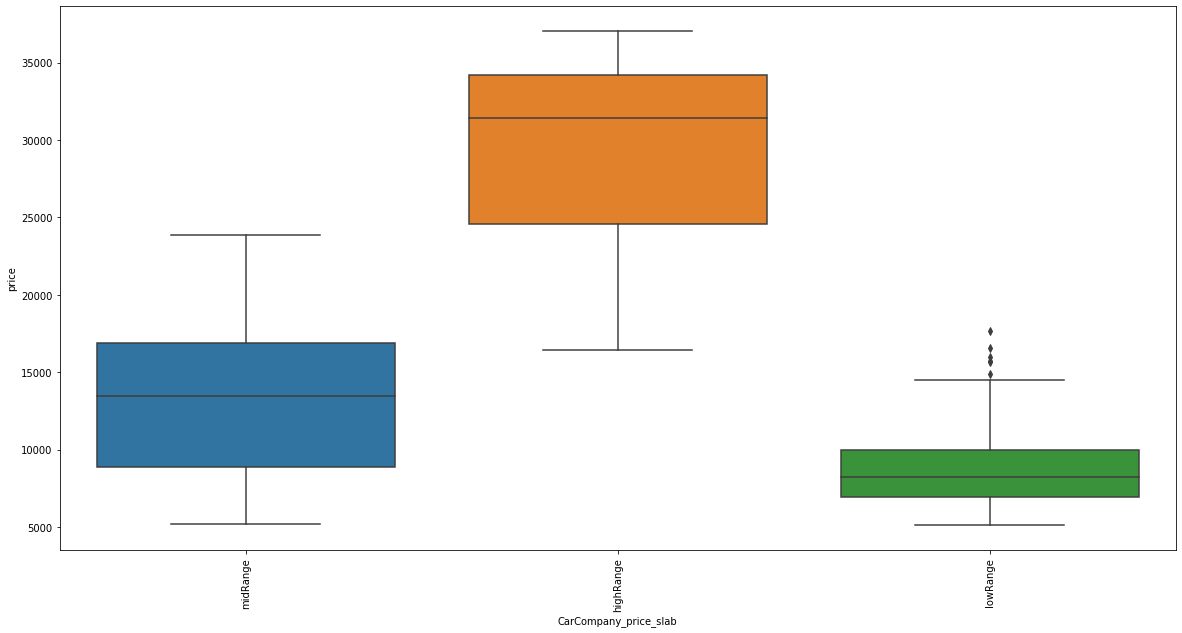

In [1074]:
plt.figure(figsize = (20, 10))
ax=sns.boxplot(x = 'CarCompany_price_slab', y = 'price', data = cars)
plt.xticks(rotation = 90) 
plt.show()

#### Observations:

company name with the different price range  shows some affect on the price.

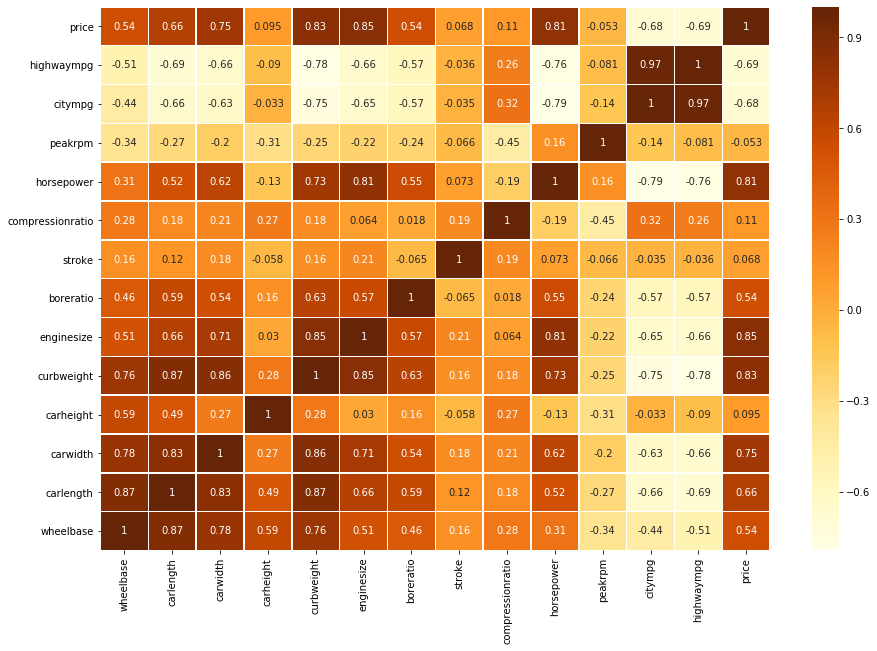

In [1075]:
# checking the correlation bewteen all the numerical variables
plt.figure(figsize=(15,10))
ax = sns.heatmap(cars.corr(), annot=True, linewidth=0.5, cmap="YlOrBr")
t,bot=ax.get_ylim()
ax.set_ylim(top=t + 0.5,bottom = bot-0.5)
plt.show()

From the above heat map we see that some of the variables have a strong positive correlation with each other:

    wheelbase
    carlength
    carwidth
    curbweight
    enginesize
    horsepower

However, there are also a few variables showing a negative relationship with price variable like,

    citympg,
    highwaympg.


### Data Preparation

In [1076]:
#checking the unique values for ech categorical feature
for i in categorical.columns:
    print(i+":\n")
    print(cars[i].unique())
    print("---------------------------------------------------------\n")

symboling:

['risky' 'moderately' 'safe']
---------------------------------------------------------

fueltype:

['gas' 'diesel']
---------------------------------------------------------

aspiration:

['std' 'turbo']
---------------------------------------------------------

doornumber:

['two' 'four']
---------------------------------------------------------

carbody:

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
---------------------------------------------------------

drivewheel:

['rwd' 'fwd' '4wd']
---------------------------------------------------------

enginelocation:

['front' 'rear']
---------------------------------------------------------

enginetype:

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
---------------------------------------------------------

cylindernumber:

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
---------------------------------------------------------

fuelsystem:

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
----------

In [1077]:
# mapping the below categorical variables which as only 2 unique values with o and 1

cars['fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars['aspiration'] = cars['aspiration'].map({'std': 1, 'turbo': 0})
cars['doornumber'] = cars['doornumber'].map({'two': 1, 'four': 0})
cars['enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany_price_slab
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,midRange
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,midRange
2,moderately,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,midRange
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,midRange
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,midRange


In [1078]:
# Creating dummy variables for the remaining categorical variables
cars = pd.get_dummies(cars)
cars.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderately,symboling_risky,symboling_safe,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_price_slab_highRange,CarCompany_price_slab_lowRange,CarCompany_price_slab_midRange
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [1079]:
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature

cars.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three',
         'fuelsystem_1bbl',
         'CarCompany_price_slab_lowRange'],axis=1,inplace=True)
cars.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'symboling_moderately',
       'symboling_safe', 'carbody_convertible', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CarCompany_price_slab_highRange',
       'CarCompany_price_slab_midRange'],
      dtype='object')

In [1080]:
cars.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderately,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_price_slab_highRange,CarCompany_price_slab_midRange
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [1081]:
len(cars.columns)

47

In [1082]:
cars.shape

(202, 47)

### Splitting the Data into Training and Testing Sets

Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset


In [1083]:
from sklearn.model_selection import train_test_split

In [1084]:
df_train,df_test=train_test_split(cars,train_size=0.7,test_size=0.3,random_state=100)
# we will specify the random state always, so that the train and test data set always have the same rows, respectively

#### Rescaling the Features using MinMax scaling technique.

In [1085]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [1086]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderately,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_price_slab_highRange,CarCompany_price_slab_midRange
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,6600,26,29,9298.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,104.3,188.8,67.2,57.5,3042,141,3.78,3.15,9.5,114,5400,24,28,16515.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,98.4,176.2,65.6,52.0,2551,146,3.62,3.50,9.3,116,4800,24,30,9989.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,94.5,165.7,64.0,51.4,2221,109,3.19,3.40,8.5,90,5500,24,29,9980.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [1087]:
# Applying the scaling on continuous numerical variables, except the 'yes-no' and 'dummy' variables

num_variables=[ 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 
 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_variables]=scaler.fit_transform(df_train[num_variables])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderately,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_price_slab_highRange,CarCompany_price_slab_midRange
1,1,1,1,1,0.068966,0.450407,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.235294,0.277778,0.358353,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.448780,0.308333,0.400000,0.301396,0.139623,0.500000,0.480952,0.15000,0.266667,1.000000,0.382353,0.333333,0.131604,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.775610,0.575000,0.808333,0.602793,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.323529,0.305556,0.358825,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.570732,0.441667,0.350000,0.412335,0.320755,0.771429,0.680952,0.14375,0.283333,0.265306,0.323529,0.361111,0.153359,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.400000,0.308333,0.300000,0.284329,0.181132,0.464286,0.633333,0.09375,0.175000,0.551020,0.323529,0.333333,0.153076,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [1088]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderately,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_price_slab_highRange,CarCompany_price_slab_midRange
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.530185,0.462766,0.50461,0.411779,0.240894,0.559980,0.551570,0.210381,0.228310,0.392387,0.358365,0.377069,0.247719,0.609929,0.106383,0.028369,0.035461,0.468085,0.12766,0.581560,0.35461,0.049645,0.007092,0.687943,0.092199,0.063830,0.028369,0.021277,0.063830,0.758865,0.113475,0.007092,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.106383,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.194656,0.181538,0.20748,0.198452,0.146364,0.192528,0.150278,0.263427,0.164713,0.199860,0.185704,0.181522,0.229291,0.489505,0.309426,0.166616,0.185601,0.500759,0.33490,0.495062,0.48010,0.217986,0.084215,0.464985,0.290337,0.245321,0.166616,0.144819,0.245321,0.429297,0.318304,0.084215,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.309426,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.409756,0.308333,0.35000,0.254849,0.135849,0.421429,0.490476,0.100000,0.091667,0.265306,0.176471,0.222222,0.087432,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.518699,0.425000,0.52500,0.359193,0.188679,0.550000,0.571429,0.125000,0.195833,0.387755,0.352941,0.361111,0.175682,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.660163,0.550000,0.65000,0.552366,0.301887,0.742857,0.633333,0.150000,0.283333,0.551020,0.500000,0.472222,0.342548,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1

### Dividing into X and Y sets for the model building

In [1089]:
y_train=df_train.pop('price')
x_train=df_train

In [1090]:
x_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_moderately,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_price_slab_highRange,CarCompany_price_slab_midRange
1,1,1,1,1,0.068966,0.450407,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.235294,0.277778,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.448780,0.308333,0.400000,0.301396,0.139623,0.500000,0.480952,0.15000,0.266667,1.000000,0.382353,0.333333,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.775610,0.575000,0.808333,0.602793,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.323529,0.305556,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.570732,0.441667,0.350000,0.412335,0.320755,0.771429,0.680952,0.14375,0.283333,0.265306,0.323529,0.361111,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.400000,0.308333,0.300000,0.284329,0.181132,0.464286,0.633333,0.09375,0.175000,0.551020,0.323529,0.333333,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [1091]:
y_train.head()

1      0.358353
165    0.131604
197    0.358825
169    0.153359
190    0.153076
Name: price, dtype: float64

#### Building a linear model using RFE(Recursive feature elimination)

In [1092]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1093]:
# Running RFE with the output number of the variable equal to 15

lm=LinearRegression()

lm.fit(x_train,y_train)
rfe =RFE(lm,15)
rfe= rfe.fit(x_train,y_train)

In [1094]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 12),
 ('aspiration', False, 3),
 ('doornumber', False, 20),
 ('enginelocation', True, 1),
 ('wheelbase', False, 6),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('stroke', True, 1),
 ('compressionratio', False, 17),
 ('horsepower', False, 28),
 ('peakrpm', True, 1),
 ('citympg', False, 11),
 ('highwaympg', False, 13),
 ('symboling_moderately', False, 26),
 ('symboling_safe', False, 23),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 18),
 ('carbody_sedan', False, 14),
 ('carbody_wagon', False, 29),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 30),
 ('enginetype_dohc', True, 1),
 ('enginetype_dohcv', False, 16),
 ('enginetype_ohc', False, 2),
 ('enginetype_ohcf', False, 7),
 ('enginetype_ohcv', False, 31),
 ('enginetype_rotor', False, 27),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_f

In [1095]:
# Selecting 15 features selected by RFE 
col=x_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'peakrpm', 'carbody_convertible', 'enginetype_dohc',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'fuelsystem_4bbl',
       'CarCompany_price_slab_highRange'],
      dtype='object')

In [1096]:
# these are the features rejected by RFE 
x_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'boreratio', 'compressionratio', 'horsepower', 'citympg',
       'highwaympg', 'symboling_moderately', 'symboling_safe',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CarCompany_price_slab_midRange'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1097]:
# Creating X_train_rfe dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [1098]:
# importing statsmodels library
import statsmodels.api as sm

# Adding a constant variable
x_train_new=sm.add_constant(x_train_rfe)

In [1099]:
x_train_new.head()

,const,enginelocation,carwidth,curbweight,enginesize,stroke,peakrpm,carbody_convertible,enginetype_dohc,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_4bbl,CarCompany_price_slab_highRange
1,1.0,1,0.316667,0.411171,0.260377,0.290476,0.346939,1,1,0,0,1,0,0,0,0
165,1.0,1,0.308333,0.301396,0.139623,0.480952,1.000000,0,1,0,0,1,0,0,0,0
197,1.0,1,0.575000,0.602793,0.301887,0.514286,0.510204,0,0,0,0,1,0,0,0,0
169,1.0,1,0.441667,0.412335,0.320755,0.680952,0.265306,0,0,0,0,1,0,0,0,0
190,1.0,1,0.308333,0.284329,0.181132,0.633333,0.551020,0,0,0,0,1,0,0,0,0


In [1100]:
# Running the linear model
lm=sm.OLS(y_train,x_train_new).fit()

In [1101]:
#summary of First linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     165.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.44e-75
Time:                        18:34:05   Log-Likelihood:                 222.25
No. Observations:                 141   AIC:                            -412.5
Df Residuals:                     125   BIC:                            -365.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1102]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,59.37
0,enginelocation,56.83
2,curbweight,48.62
1,carwidth,44.07
10,cylindernumber_four,41.67
4,stroke,20.35
11,cylindernumber_six,11.25
9,cylindernumber_five,5.90
5,peakrpm,5.66
8,cylindernumber_eight,4.81


enginesize is insignificant in presence of other variables; having __p value high and high VIF__ can be dropped

In [1103]:
# Rebuilding the model without enginesize
x_train_rfe=x_train_rfe.drop(['enginesize'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.74e-76
Time:                        18:34:09   Log-Likelihood:                 221.98
No. Observations:                 141   AIC:                            -414.0
Df Residuals:                     126   BIC:                            -369.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1104]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,48.44
1,carwidth,43.36
9,cylindernumber_four,35.66
2,curbweight,32.43
3,stroke,16.69
10,cylindernumber_six,7.07
4,peakrpm,5.55
8,cylindernumber_five,5.29
7,cylindernumber_eight,3.54
13,CarCompany_price_slab_highRange,2.43


stroke is insignificant in presence of other variables; having __p value high and high VIF__ can be dropped

In [1105]:
# Rebuilding the model without stroke
x_train_rfe=x_train_rfe.drop(['stroke'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.02e-77
Time:                        18:34:10   Log-Likelihood:                 221.69
No. Observations:                 141   AIC:                            -415.4
Df Residuals:                     127   BIC:                            -374.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1106]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,43.36
0,enginelocation,42.47
8,cylindernumber_four,35.32
2,curbweight,32.07
9,cylindernumber_six,7.01
3,peakrpm,5.42
7,cylindernumber_five,5.22
6,cylindernumber_eight,3.53
12,CarCompany_price_slab_highRange,2.41
11,fuelsystem_4bbl,2.22


cylindernumber_six is insignificant in presence of other variables; having __p value > 0.05 and high VIF__ can be dropped

In [1107]:
# Rebuilding the model without cylindernumber_six
x_train_rfe=x_train_rfe.drop(['cylindernumber_six'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     208.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.55e-78
Time:                        18:34:12   Log-Likelihood:                 221.06
No. Observations:                 141   AIC:                            -416.1
Df Residuals:                     128   BIC:                            -377.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1108]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,43.07
2,curbweight,31.20
0,enginelocation,27.12
8,cylindernumber_four,10.10
3,peakrpm,4.88
11,CarCompany_price_slab_highRange,2.06
7,cylindernumber_five,1.86
6,cylindernumber_eight,1.77
5,enginetype_dohc,1.42
4,carbody_convertible,1.38


cylindernumber_eight is insignificant in presence of other variables; having __p value high __ can be dropped

In [1109]:
# Rebuilding the model without cylindernumber_eight
x_train_rfe=x_train_rfe.drop(['cylindernumber_eight'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.00e-79
Time:                        18:34:13   Log-Likelihood:                 220.77
No. Observations:                 141   AIC:                            -417.5
Df Residuals:                     129   BIC:                            -382.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1110]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,37.64
2,curbweight,29.20
0,enginelocation,27.12
7,cylindernumber_four,9.52
3,peakrpm,4.88
10,CarCompany_price_slab_highRange,1.88
6,cylindernumber_five,1.63
5,enginetype_dohc,1.38
9,fuelsystem_4bbl,1.32
4,carbody_convertible,1.20


enginetype_dohc is insignificant in presence of other variables; having __p value high __ can be dropped

In [1111]:
# Rebuilding the model without enginetype_dohc
x_train_rfe=x_train_rfe.drop(['enginetype_dohc'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     249.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           9.50e-80
Time:                        18:34:14   Log-Likelihood:                 220.05
No. Observations:                 141   AIC:                            -418.1
Df Residuals:                     130   BIC:                            -385.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1112]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,35.85
2,curbweight,27.06
0,enginelocation,27.04
6,cylindernumber_four,9.34
3,peakrpm,4.73
9,CarCompany_price_slab_highRange,1.85
5,cylindernumber_five,1.62
8,fuelsystem_4bbl,1.31
7,cylindernumber_twelve,1.10
4,carbody_convertible,1.07


cylindernumber_twelve is insignificant in presence of other variables;  having __p value high __ can be dropped

In [1113]:
# Rebuilding the model without cylindernumber_twelve
x_train_rfe=x_train_rfe.drop(['cylindernumber_twelve'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     275.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.47e-80
Time:                        18:34:16   Log-Likelihood:                 218.99
No. Observations:                 141   AIC:                            -418.0
Df Residuals:                     131   BIC:                            -388.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1114]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,35.83
0,enginelocation,27.04
2,curbweight,26.92
6,cylindernumber_four,9.30
3,peakrpm,4.73
8,CarCompany_price_slab_highRange,1.82
5,cylindernumber_five,1.60
7,fuelsystem_4bbl,1.31
4,carbody_convertible,1.06


carwidth is having  __VIF value high__ means having high multicollinearity  can be dropped

In [1115]:
# Rebuilding the model without carwidth
x_train_rfe=x_train_rfe.drop(['carwidth'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     225.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.55e-73
Time:                        18:34:18   Log-Likelihood:                 197.41
No. Observations:                 141   AIC:                            -376.8
Df Residuals:                     132   BIC:                            -350.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1116]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,25.43
5,cylindernumber_four,9.27
1,curbweight,8.53
2,peakrpm,4.67
7,CarCompany_price_slab_highRange,1.82
4,cylindernumber_five,1.47
6,fuelsystem_4bbl,1.30
3,carbody_convertible,1.04


cylindernumber_five is insignificant in presence of other variables;  having __p value high__ can be dropped

In [1117]:
# Rebuilding the model without cylindernumber_five
x_train_rfe=x_train_rfe.drop(['cylindernumber_five'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     258.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.34e-74
Time:                        18:34:19   Log-Likelihood:                 197.19
No. Observations:                 141   AIC:                            -378.4
Df Residuals:                     133   BIC:                            -354.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1118]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,23.26
1,curbweight,8.52
4,cylindernumber_four,7.34
2,peakrpm,4.66
6,CarCompany_price_slab_highRange,1.80
5,fuelsystem_4bbl,1.24
3,carbody_convertible,1.04


fuelsystem_4bbl is insignificant in presence of other variables; having __p value high__ can be dropped

In [1119]:
# Rebuilding the model without fuelsystem_4bbl
x_train_rfe=x_train_rfe.drop(['fuelsystem_4bbl'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     299.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.20e-75
Time:                        18:34:22   Log-Likelihood:                 196.09
No. Observations:                 141   AIC:                            -378.2
Df Residuals:                     134   BIC:                            -357.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1120]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,22.45
1,curbweight,8.42
4,cylindernumber_four,6.47
2,peakrpm,4.44
5,CarCompany_price_slab_highRange,1.77
3,carbody_convertible,1.04


enginelocation is having  __VIF value high__ means having high multicollinearity  can be dropped

In [1121]:
# Rebuilding the model without enginelocation
x_train_rfe=x_train_rfe.drop(['enginelocation'],axis=1)
x_train_new=x_train_rfe
x_train_lm = sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     295.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.90e-71
Time:                        18:34:24   Log-Likelihood:                 183.02
No. Observations:                 141   AIC:                            -354.0
Df Residuals:                     135   BIC:                            -336.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [1122]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,3.84
1,peakrpm,3.11
3,cylindernumber_four,3.06
4,CarCompany_price_slab_highRange,1.77
2,carbody_convertible,1.04


Looks like P values is in allowed range(<0.05) and VIF is < 5 looks the model build was good

#### Residual Analysis of the train data

In [1123]:
y_train_pred=lm.predict(x_train_lm)

Text(0.5, 0, 'Errors')

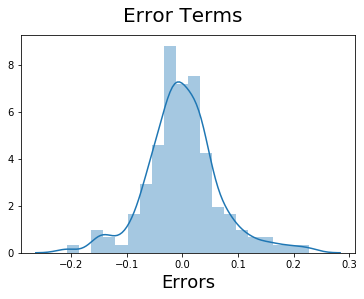

In [1124]:
#check if the error terms are also normally distributed
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### Making Predictions

In [1125]:
num_variables=[ 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 
 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_variables] = scaler.transform(df_test[num_variables])

### Dividing into X_test and y_test

In [1126]:
y_test = df_test.pop('price')
x_test = df_test

In [1127]:
x_train_new.columns

Index(['curbweight', 'peakrpm', 'carbody_convertible', 'cylindernumber_four',
       'CarCompany_price_slab_highRange'],
      dtype='object')

In [1128]:

x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [1129]:
y_pred = lm.predict(x_test_new)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

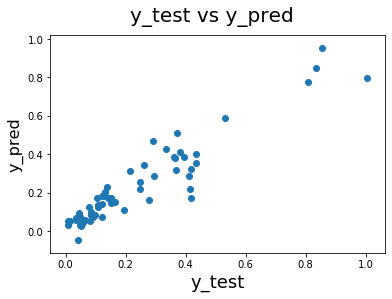

In [1130]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [1131]:
# Test set R2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8843430802140059

The R-squared value on the trained data is very close to the Adj. R-Squared value which indicates that none of the parameters in model are redundant. 
We have a significantly high r2_score on the test dataset.
With a low p-value and low VIF,indicates that model has best fit in line.

| Features | Coef | p-value | VIF|
| --- | --- | --- |--- |
| curbweight | 0.6830 |  0.000 | 3.84 |
| peakrpm | 0.1629 | 0.000 |3.11 |
| carbody_convertible | 0.1000 | 0.004 |1.04 |
| cylindernumber_four | -0.0711 | 0.000 |3.06 |
| CarCompany_price_slab_highRange | 0.3098 | 0.000 |1.77 |

We can see that the equation of our best fitted line is:

__price__ = 0.6830 * __curbweight__ + 0.1629 * __peakrpm__ + 0.1 * __carbody_convertible__ + 0.3098 * __CarCompany_price_slab_highRange__  - 0.0711 * __cylindernumber_four__


Overall we have a decent model.

## Conclusion:
From the model we learn that the variables that can affect Car Price are:

1.curbweight                           
2.peakrpm                             
3.carbody_convertible                 
4.cylindernumber_four                
5.CarCompany_price_slab_highRange 
    